In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ROOT_DIR = pathlib.Path().resolve().parent
ERR_DIR = ROOT_DIR / 'results' / 'error_array'
FIG_DIR = ROOT_DIR / 'results' / 'figures'

In [3]:
DATA_NAMES = [
    'synthetic',
    'Mpg',
    'abalone',
    'automobile',
    'cpu',
    'liver',
    'servo',
    'student',
    'wine_quality',
]

In [4]:
MODELNAME_LIST = [
    'MTGB100_depth3',
    'MTGB100_depth5',
    'MTGB100_depth15',
    'GB100_depth3',
    'GB100_depth5',
    'GB100_depth15',
    'GBccp005100_depth3',
    'GBccp005100_depth5',
    'GBccp005100_depth15',
    'GBccp01100_depth3',
    'GBccp01100_depth5',
    'GBccp01100_depth15',
    ]

In [5]:
ERR_DIR

PosixPath('/Users/1nao/GitHub/Gradient_Boosting_Meta_Tree/results/error_array')

In [6]:
# load the error arrays
err_dict = {}
for data_name in DATA_NAMES:
    err_dict[data_name] = {}
    for modelname in MODELNAME_LIST:
        try:
            err_dict[data_name][modelname] = {
                'train_mse_arr': np.load(ERR_DIR / f'{data_name}_{modelname}_train_mse.npy'),
                'test_mse_arr': np.load(ERR_DIR / f'{data_name}_{modelname}_test_mse.npy'),
                }
        except:
            print(f'{data_name}_{modelname} does not exist.')
            err_dict[data_name][modelname] = None

synthetic_GBccp005100_depth3 does not exist.
synthetic_GBccp005100_depth5 does not exist.
synthetic_GBccp005100_depth15 does not exist.
synthetic_GBccp01100_depth3 does not exist.
synthetic_GBccp01100_depth5 does not exist.
synthetic_GBccp01100_depth15 does not exist.


In [7]:
# calculate the average and standard error of the mean
res_dict = {}
for data_name in DATA_NAMES:
    res_dict[data_name] = {}
    for modelname in MODELNAME_LIST:
        if err_dict[data_name][modelname] is None:
            res_dict[data_name][modelname] = None
            continue
        res_dict[data_name][modelname] = {
            'train_ms_avg': np.mean(err_dict[data_name][modelname]['train_mse_arr']),
            'train_mse_sem': np.std(err_dict[data_name][modelname]['train_mse_arr']) / np.sqrt(len(err_dict[data_name][modelname]['train_mse_arr'])),
            'test_mse_avg': np.mean(err_dict[data_name][modelname]['test_mse_arr']),
            'test_mse_sem': np.std(err_dict[data_name][modelname]['test_mse_arr']) / np.sqrt(len(err_dict[data_name][modelname]['test_mse_arr'])),
        }

In [8]:
# create a dataframe
# multicolumn of model and train/test mse/sem
model_list = []
for modelname in MODELNAME_LIST:
    model_list += [modelname]*4
mse_sem_list = ['train_mse_avg', 'train_mse_sem', 'test_mse_avg', 'test_mse_sem']
mse_sem_list = mse_sem_list * len(MODELNAME_LIST)
multi_columns = pd.MultiIndex.from_tuples(list(zip(model_list, mse_sem_list)))
df1 = pd.DataFrame(columns=multi_columns, index=DATA_NAMES)

for data_name in DATA_NAMES:
    for modelname in MODELNAME_LIST:
        if res_dict[data_name][modelname] is None:
            continue
        df1.loc[data_name, (modelname, 'train_mse_avg')] = res_dict[data_name][modelname]['train_ms_avg']
        df1.loc[data_name, (modelname, 'train_mse_sem')] = res_dict[data_name][modelname]['train_mse_sem']
        df1.loc[data_name, (modelname, 'test_mse_avg')] = res_dict[data_name][modelname]['test_mse_avg']
        df1.loc[data_name, (modelname, 'test_mse_sem')] = res_dict[data_name][modelname]['test_mse_sem']
df1

MTGB100_depth3                                          \
              train_mse_avg train_mse_sem test_mse_avg test_mse_sem   
synthetic          0.083931      0.000681     0.219799     0.005657   
Mpg                0.054719      0.000587     0.149934      0.00987   
abalone            0.212894      0.002198     0.509555     0.009982   
automobile         0.032296      0.000794     0.241296     0.035566   
cpu                0.022579      0.000434     0.129173     0.020397   
liver              0.142805      0.003246     1.100917     0.065315   
servo              0.050759      0.001104     0.126409     0.026612   
student            0.142334      0.001735     0.943903     0.032178   
wine_quality       0.313948      0.002161     0.619211     0.011387   

             MTGB100_depth5                                          \
              train_mse_avg train_mse_sem test_mse_avg test_mse_sem   
synthetic          0.139907      0.001841     0.195868     0.004173   
Mpg                0.039592      0.000474     0.151148     0.011506   
abalone            0.140417      0.002158     0.531685       0.0082   
automobile         0.021816      0.000714     0.235646     0.028721   
cpu                 0.01797      0.000436     0.144998     0.025602   
liver              0.101732      0.001931     1.082714     0.068062   
servo                0.0347      0.000585     0.129125     0.041708   
student            0.092852      0.001313     1.025132     0.030029   
wine_quality       0.139346      0.003209     0.591242     0.011476   

             MTGB100_depth15                ... GBccp01100_depth3  \
               train_mse_avg train_mse_sem  ...      test_mse_avg   
synthetic           0.083931      0.000681  ...               NaN   
Mpg                 0.028372      0.000301  ...           0.17124   
abalone             0.062034      0.000356  ...          0.537303   
automobile           0.01975      0.000498  ...          0.293861   
cpu                 0.018132      0.000473  ...          0.150462   
liver               0.073203       0.00087  ...           0.91656   
servo               0.031382      0.000263  ...          0.168629   
student             0.075709      0.000495  ...          0.845377   
wine_quality        0.057918      0.000343  ...           0.71121   

                          GBccp01100_depth5                             \
             test_mse_sem     train_mse_avg train_mse_sem test_mse_avg   
synthetic             NaN               NaN           NaN          NaN   
Mpg              0.012251          0.107977      0.002115     0.165338   
abalone          0.010879          0.493225      0.002745     0.526879   
automobile        0.04164          0.077919      0.002508     0.271387   
cpu              0.028029          0.043864      0.001118     0.174948   
liver            0.044525          0.432106      0.007469     0.933529   
servo            0.036154          0.087976      0.002665     0.162548   
student          0.025613          0.470969      0.009023     0.874535   
wine_quality     0.011755          0.686658      0.003564     0.712998   

                          GBccp01100_depth15                             \
             test_mse_sem      train_mse_avg train_mse_sem test_mse_avg   
synthetic             NaN                NaN           NaN          NaN   
Mpg              0.011002           0.107977      0.002115     0.165338   
abalone          0.009114           0.493303      0.002731     0.526369   
automobile       0.024072           0.072614      0.002284     0.292923   
cpu              0.035142           0.043864      0.001118     0.153328   
liver            0.053132           0.385155      0.007272     0.976936   
servo            0.031945            0.07539      0.002511     0.165777   
student          0.028993           0.428189      0.006366     0.898323   
wine_quality     0.011727           0.686658      0.003564     0.712998   

                           
             test_ms

In [9]:
# create a dataframe with the diffrent multi columns

mse_sem_list = []
for val in ['train_mse_avg', 'train_mse_sem', 'test_mse_avg', 'test_mse_sem']:
    mse_sem_list += [val]*len(MODELNAME_LIST)
model_list = MODELNAME_LIST * 4
multi_columns = pd.MultiIndex.from_tuples(list(zip(mse_sem_list,model_list)))
df2 = pd.DataFrame(columns=multi_columns, index=DATA_NAMES)

for data_name in DATA_NAMES:
    for modelname in MODELNAME_LIST:
        if res_dict[data_name][modelname] is None:
            continue
        df2.loc[data_name, ('train_mse_avg', modelname)] = res_dict[data_name][modelname]['train_ms_avg']
        df2.loc[data_name, ('train_mse_sem', modelname)] = res_dict[data_name][modelname]['train_mse_sem']
        df2.loc[data_name, ('test_mse_avg', modelname)] = res_dict[data_name][modelname]['test_mse_avg']
        df2.loc[data_name, ('test_mse_sem', modelname)] = res_dict[data_name][modelname]['test_mse_sem']
df2

train_mse_avg                                              \
             MTGB100_depth3 MTGB100_depth5 MTGB100_depth15 GB100_depth3   
synthetic          0.083931       0.139907        0.083931     0.258823   
Mpg                0.054719       0.039592        0.028372     0.001448   
abalone            0.212894       0.140417        0.062034     0.190312   
automobile         0.032296       0.021816         0.01975     0.000001   
cpu                0.022579        0.01797        0.018132     0.003075   
liver              0.142805       0.101732        0.073203     0.018459   
servo              0.050759         0.0347        0.031382      0.00288   
student            0.142334       0.092852        0.075709     0.017898   
wine_quality       0.313948       0.139346        0.057918     0.310661   

                                                                               \
             GB100_depth5 GB100_depth15 GBccp005100_depth3 GBccp005100_depth5   
synthetic        0.055167      0.035901                NaN                NaN   
Mpg                   0.0           0.0           0.094927           0.084981   
abalone          0.040851           0.0           0.457114           0.445055   
automobile            0.0           0.0           0.062569           0.042832   
cpu              0.003011      0.003011           0.034444           0.032083   
liver                 0.0           0.0            0.43508           0.300243   
servo                 0.0           0.0           0.074291            0.05543   
student               0.0           0.0           0.403392           0.292082   
wine_quality      0.06411           0.0           0.641437           0.622546   

                                                    ...    test_mse_sem  \
             GBccp005100_depth15 GBccp01100_depth3  ... MTGB100_depth15   
synthetic                    NaN               NaN  ...        0.005657   
Mpg                     0.084544          0.115993  ...        0.010362   
abalone                 0.442249          0.504646  ...         0.00931   
automobile              0.040363          0.100835  ...        0.037128   
cpu                     0.032083           0.04417  ...        0.024671   
liver                   0.221222          0.528614  ...        0.080992   
servo                   0.048081          0.097611  ...        0.051507   
student                 0.230926           0.55363  ...        0.033131   
wine_quality            0.621539           0.68493  ...        0.012382   

                                                                         \
             GB100_depth3 GB100_depth5 GB100_depth15 GBccp005100_depth3   
synthetic        0.008529     0.001497      0.005888                NaN   
Mpg              0.010652     0.009072      0.015625            0.00925   
abalone           0.00977     0.008586      0.013066           0.008813   
automobile       0.047066     0.036579      0.049637           0.039231   
cpu              0.018215     0.032531      0.028709           0.023573   
liver            0.055715     0.051022      0.111241           0.046905   
servo            0.026742      0.04294      0.060996           0.027159   
student          0.038763     0.025594      0.059186           0.030526   
wine_quality     0.012779     0.012706      0.014833           0.011336   

                                                                       \
             GBccp005100_depth5 GBccp005100_depth15 GBccp01100_depth3   
synthetic                   NaN                 NaN               NaN   
Mpg                     0.00974            0.009509          0.012251   
abalone                 0.00688            0.008175          0.010879   
automobile             0.032579            0.039469           0.04164   
cpu                    0.031556            0.024399          0.028029   
liver                  0.058249            0.055867          0.044525   
servo                  0.046617            0.043873         

In [11]:
RESULT_DIR = ROOT_DIR / 'results'
df2.to_csv(RESULT_DIR / 'boosting_experiment_results.csv')

# root split probabilities

In [12]:
# load the error arrays
root_split_proba_dict = {}
for data_name in DATA_NAMES:
    root_split_proba_dict[data_name] = {}
    for modelname in MODELNAME_LIST:
        try:
            root_split_proba_dict[data_name][modelname] = np.load(ERR_DIR / f'{data_name}_{modelname}_root_split_proba_list.npy')
        except:
            root_split_proba_dict[data_name][modelname] = None

In [13]:
root_split_proba_stats = {}
for data_name in DATA_NAMES:
    root_split_proba_stats[data_name] = {}
    for modelname in MODELNAME_LIST:
        if root_split_proba_dict[data_name][modelname] is not None:
            root_split_proba_stats[data_name][modelname] = {
                'mean': np.mean(root_split_proba_dict[data_name][modelname], axis=0),
                'sem': np.std(root_split_proba_dict[data_name][modelname], axis=0) / np.sqrt(root_split_proba_dict[data_name][modelname].shape[0]),
            }
        else:
            root_split_proba_stats[data_name][modelname] = None

In [14]:
data_name = 'Mpg'

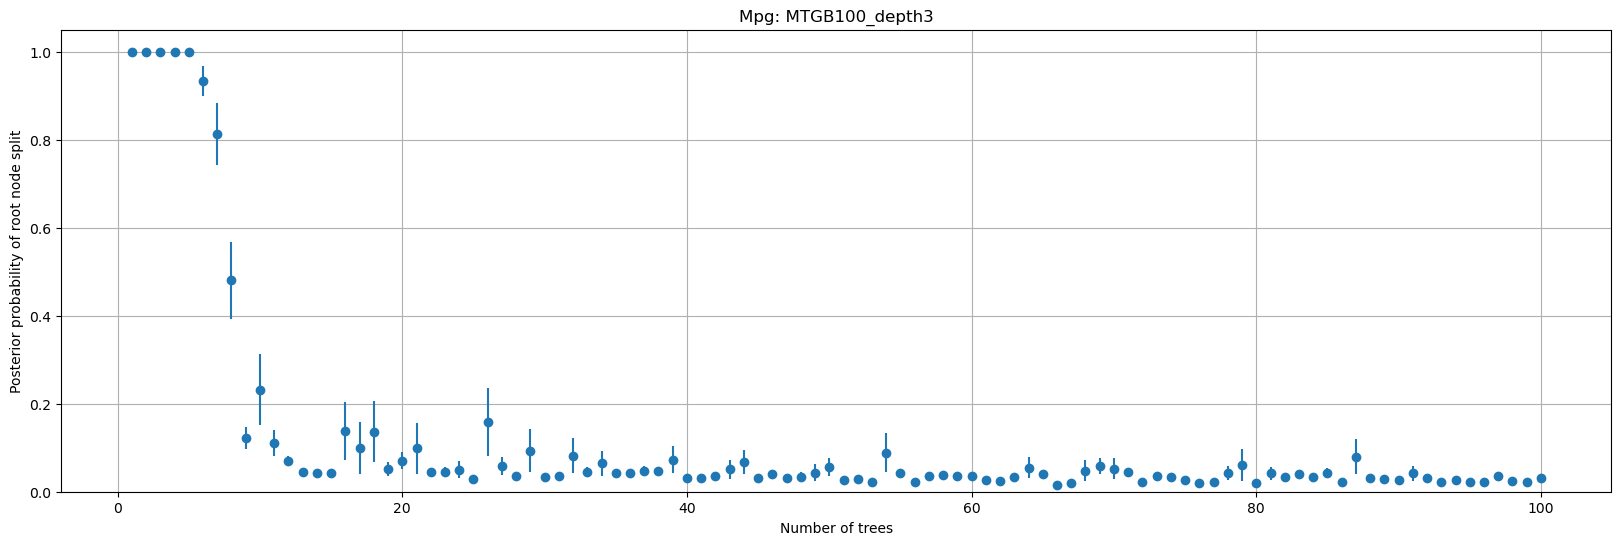

In [15]:
split_proba_dir = FIG_DIR / 'root_split_probabilities'
os.makedirs(split_proba_dir, exist_ok=True)
def plot_root_split_proba(
    data_name,
    modelname,
    show_fig=True
):
    num_tree = root_split_proba_stats[data_name][modelname]['mean'].shape[0]
    x = list(range(1, num_tree+1))
    y = root_split_proba_stats[data_name][modelname]['mean']
    yerr = root_split_proba_stats[data_name][modelname]['sem']

    fig = plt.figure(figsize=(20, 6))
    plt.errorbar(x, y, yerr=yerr, fmt='o', label='Root split probability')
    plt.xlabel('Number of trees')
    plt.ylabel('Posterior probability of root node split')
    plt.title(f'{data_name}: {modelname}')
    plt.grid()
    plt.ylim(0, 1.05)

    figname = f'root_split_proba_{data_name}_{modelname}.png'
    plt.savefig(split_proba_dir / figname)
    if show_fig:
        plt.show()
    plt.close()

plot_root_split_proba('Mpg','MTGB100_depth3')

In [16]:
for data_name in DATA_NAMES:
    for modelname in ['MTGB100_depth3', 'MTGB100_depth5', 'MTGB100_depth15']:
        if root_split_proba_stats[data_name][modelname] is not None:
            plot_root_split_proba(data_name, modelname, show_fig=False)